1. Load and Profile Data

In [12]:
import pandas as pd
# Replace with your dataset path, e.g., 'benin-solar-data.csv'
df = pd.read_csv('../data/benin-malanville.csv')
# Display first 5 rows
print(df.head())
# Column names and data types
print(df.info())

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
<class 'pandas.core.

2. Summary Statistics & Missing-Value Report

In [13]:
# Summary statistics for numeric columns
print(df.describe())
# Missing value counts
print(df.isna().sum())
# Percentage of missing values
missing_percent = df.isna().mean() * 100
print("\nColumns with >5% missing values:")
print(missing_percent[missing_percent > 5])

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.2000

3. Outlier Detection and Basic Cleaning

In [14]:
#Compute Z-scores for GHI, DNI, DHI, ModA, ModB, WS, WSgust:
from scipy.stats import zscore
# Columns to check for outliers
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
# Calculate Z-scores
z_scores = df[cols].apply(zscore, nan_policy='omit')
# Flag rows where any |Z| > 3
outliers = (z_scores.abs() > 3).any(axis=1)
print(f"Number of rows with outliers (|Z|>3): {outliers.sum()}")
# Display outlier rows (optional)
print(df[outliers].head())

Number of rows with outliers (|Z|>3): 7740
            Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH   WS  \
670  2021-08-09 11:11   836.0  235.0  610.6   778.8   783.8  30.3  68.2  3.2   
671  2021-08-09 11:12  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6  3.4   
672  2021-08-09 11:13   938.0  340.1  612.8   891.1   891.1  30.4  68.4  3.4   
673  2021-08-09 11:14   718.5  126.8  593.2   682.6   682.6  30.6  68.2  4.7   
674  2021-08-09 11:15  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1  4.0   

     WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
670     4.1      0.7  190.5     18.4  999         0            0.0   63.0   
671     4.1      0.6  175.8     13.3  999         0            0.0   63.7   
672     4.6      0.9  171.5     11.9  999         0            0.0   65.8   
673     5.6      0.6  160.7      8.0  999         0            0.0   65.4   
674     4.6      0.4  169.1     12.3  999         0            0.0   65.0   

     TModB  C

In [10]:
#Handle Missing Values:
# Impute missing values with median for key columns
for col in cols:
    if df[col].isna().mean() < 0.05:  # Less than 5% missing
        df[col].fillna(df[col].median(), inplace=True)
    else:
        print(f"{col} has >5% missing, review before imputing.")
# Drop rows with missing values in critical columns (if needed)
df.dropna(subset=['GHI', 'DNI', 'DHI'], inplace=True)
# Verify no missing values in key columns
print(df[cols].isna().sum())

C:\Users\abdel\AppData\Local\Temp\ipykernel_25368\1144182097.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\abdel\AppData\Local\Temp\ipykernel_25368\1144182097.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


In [11]:
#Export Cleaned Data:
# Save cleaned DataFrame
df.to_csv('../data/benin_clean.csv', index=False)
print("Cleaned data saved to data/benin_clean.csv")

Cleaned data saved to data/benin_clean.csv


3. Time Series Analysis

In [ ]:
# Convert Timestamp:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

Matplotlib is building the font cache; this may take a moment.


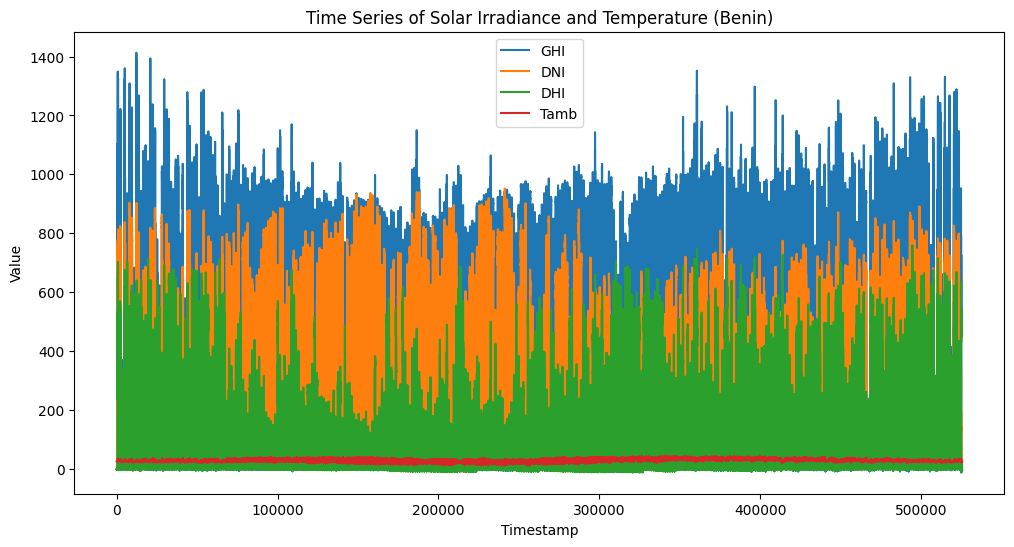

In [16]:
#Line Plot:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot GHI, DNI, DHI, Tamb
plt.figure(figsize=(12, 6))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(df.index, df[col], label=col)
plt.title('Time Series of Solar Irradiance and Temperature (Benin)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

4. Cleaning Impact

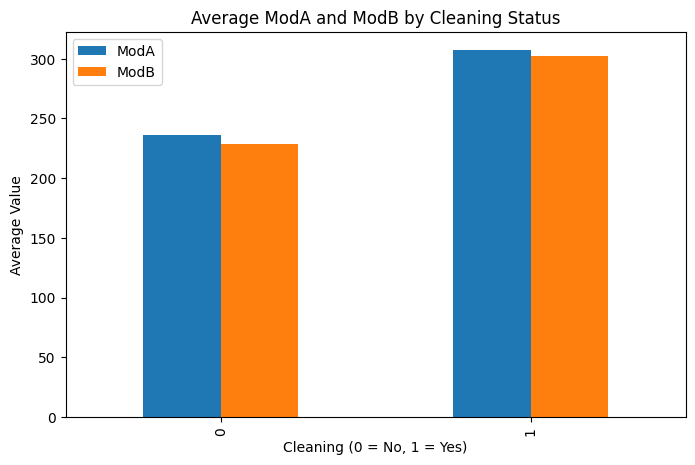

In [18]:
# Group by Cleaning flag and compute averages
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
# Plot
cleaning_impact.plot(kind='bar', figsize=(8, 5))
plt.title('Average ModA and ModB by Cleaning Status')
plt.xlabel('Cleaning (0 = No, 1 = Yes)')
plt.ylabel('Average Value')
plt.show()

5.  Correlation and Relationship Analysis 

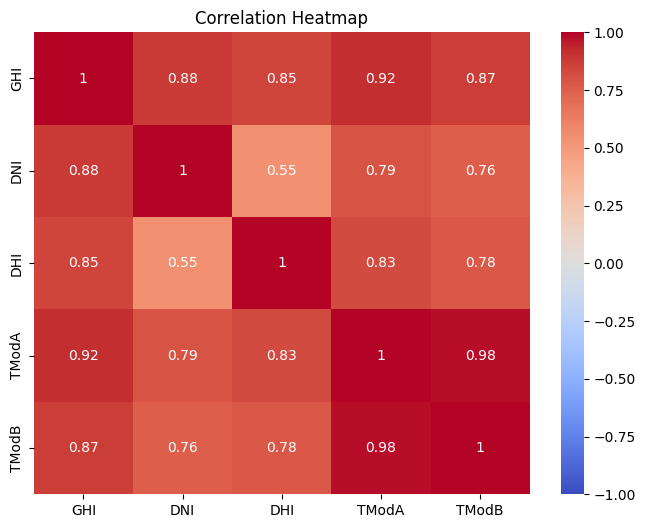

In [19]:
# Correlation Heatmap:
# Correlation matrix
corr = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

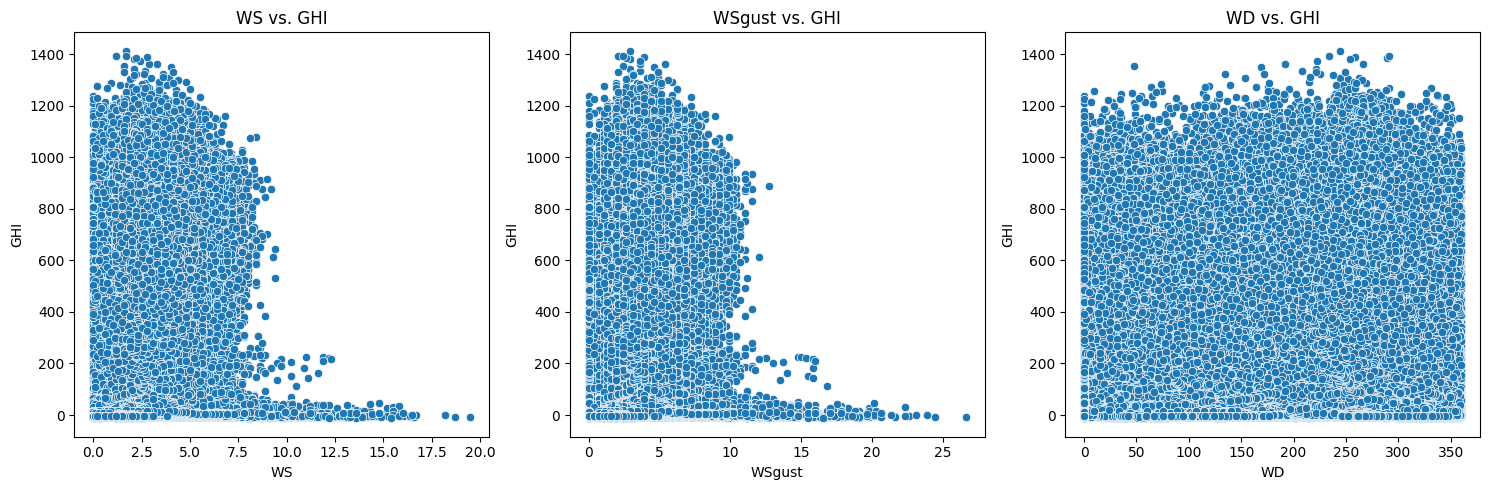

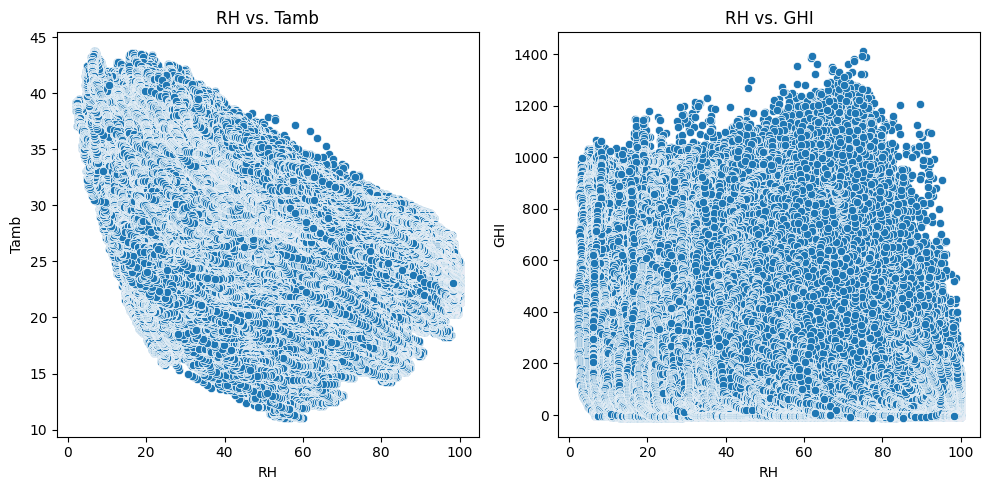

In [20]:
#Scatter Plots:
# Scatter plots: WS, WSgust, WD vs. GHI
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='WS', y='GHI', data=df)
plt.title('WS vs. GHI')
plt.subplot(1, 3, 2)
sns.scatterplot(x='WSgust', y='GHI', data=df)
plt.title('WSgust vs. GHI')
plt.subplot(1, 3, 3)
sns.scatterplot(x='WD', y='GHI', data=df)
plt.title('WD vs. GHI')
plt.tight_layout()
plt.show()
# RH vs. Tamb and RH vs. GHI
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='RH', y='Tamb', data=df)
plt.title('RH vs. Tamb')
plt.subplot(1, 2, 2)
sns.scatterplot(x='RH', y='GHI', data=df)
plt.title('RH vs. GHI')
plt.tight_layout()
plt.show()

6. Wind and Distribution Analysis

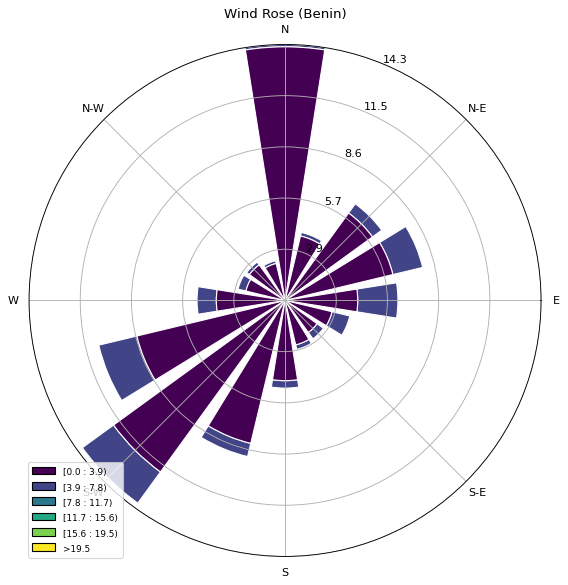

In [21]:
#Wind Rose:
from windrose import WindroseAxes
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose (Benin)')
plt.show()

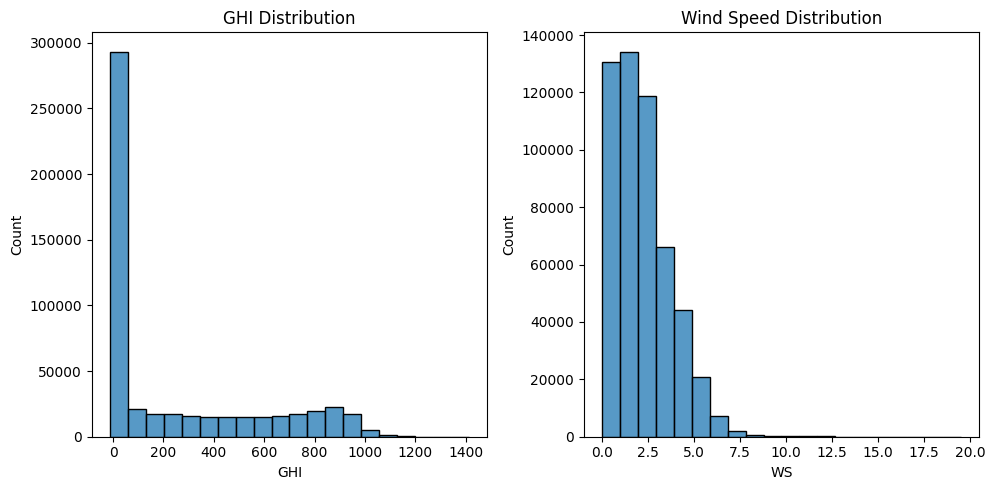

In [22]:
# Histograms:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['GHI'], bins=20)
plt.title('GHI Distribution')
plt.subplot(1, 2, 2)
sns.histplot(df['WS'], bins=20)
plt.title('Wind Speed Distribution')
plt.tight_layout()
plt.show()

7.  Temperature Analysis

- Scatter plots shows when RH increases the Tamb decreases
- Further analysis could involve regression to quantify RH’s impact.

8. Bubble Chart

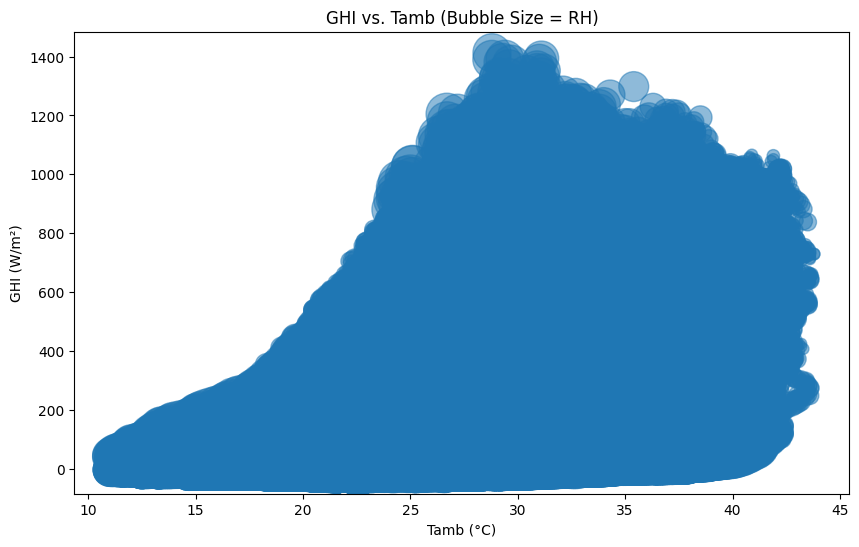

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Tamb'], df['GHI'], s=df['RH']*10, alpha=0.5)
plt.title('GHI vs. Tamb (Bubble Size = RH)')
plt.xlabel('Tamb (°C)')
plt.ylabel('GHI (W/m²)')
plt.show()